In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import re
import string
from scipy import stats

In [2]:
# Reading the data

df = pd.read_csv('singapore_airbnb_dirty_data.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7907 entries, 0 to 7906
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              7895 non-null   object 
 1   name                            7863 non-null   object 
 2   host_id                         7907 non-null   object 
 3   host_name                       7907 non-null   object 
 4   neighbourhood_group             7841 non-null   object 
 5   neighbourhood                   7870 non-null   object 
 6   latitude                        7907 non-null   float64
 7   longitude                       7907 non-null   float64
 8   room_type                       7890 non-null   object 
 9   price                           7907 non-null   int64  
 10  minimum_nights                  7891 non-null   object 
 11  number_of_reviews               7907 non-null   int64  
 12  last_review                     51

In [4]:
#Some of the columns should be category type. Most of them are object type as data is dirty and inconsistent
#Columns to be converted to Category: neighbourhood_group, room_type

In [5]:
# Missing values in Each column
print('Column Name' + '\t\t' + 'Null Values')
df.apply(lambda x: sum(x.isnull()),axis=0)

Column Name		Null Values


id                                  12
name                                44
host_id                              0
host_name                            0
neighbourhood_group                 66
neighbourhood                       37
latitude                             0
longitude                            0
room_type                           17
price                                0
minimum_nights                      16
number_of_reviews                    0
last_review                       2758
reviews_per_month                 2758
calculated_host_listings_count       0
availability_365                   386
dtype: int64

In [6]:
#Checking Unique Identifiers in our Data
print('Column Name' + '\t\t\t' + 'IsUnique')
df.apply(lambda x: x.is_unique,axis=0)

Column Name			IsUnique


id                                False
name                              False
host_id                           False
host_name                         False
neighbourhood_group               False
neighbourhood                     False
latitude                          False
longitude                         False
room_type                         False
price                             False
minimum_nights                    False
number_of_reviews                 False
last_review                       False
reviews_per_month                 False
calculated_host_listings_count    False
availability_365                  False
dtype: bool

In [7]:
# Handling ID Column
# The above output shows that ID is not unique. so, it can be dropped

df = df.drop('id', axis = 1)

In [8]:
df[df['neighbourhood'].isnull()]['neighbourhood_group'].value_counts()

Central Region       31
East Region           3
North-East Region     2
North Region          1
Name: neighbourhood_group, dtype: int64

In [9]:
## Looking for neighbourhood value that occurs the most to be used as value in place of null group values

print(df[df['neighbourhood_group'] == 'Central Region']['neighbourhood'].value_counts())

Kallang             1034
Geylang              972
Rochor               531
Novena               529
Outram               472
Bukit Merah          463
Downtown Core        426
River Valley         357
Queenstown           260
Tanglin              206
Singapore River      174
Marine Parade        171
Orchard              135
Newton               133
Bukit Timah          127
Toa Payoh             99
Museum                62
Bishan                56
Southern Islands      16
Marina South           1
Name: neighbourhood, dtype: int64


In [10]:
# Replacing Central Region Neighbourhood values with Kallang

cond = (df['neighbourhood_group'] == 'Central Region') & (df['neighbourhood'].isnull())
df.loc[cond, 'neighbourhood'] = 'Kallang'

In [11]:
print(df[df['neighbourhood_group'] == 'North-East Region']['neighbourhood'].value_counts())


Hougang       108
Serangoon      68
Sengkang       67
Ang Mo Kio     56
Punggol        42
Name: neighbourhood, dtype: int64


In [12]:
# Replacing NE Region Neighbourhood values with Hougang

cond = (df['neighbourhood_group'] == 'North-East Region') & (df['neighbourhood'].isnull())
df.loc[cond, 'neighbourhood'] = 'Hougang'

In [13]:
print(df[df['neighbourhood_group'] == 'East Region']['neighbourhood'].value_counts())

Bedok        369
Pasir Ris     71
Tampines      63
Name: neighbourhood, dtype: int64


In [14]:
# Replacing East Region Neighbourhood values with Bedok

cond = (df['neighbourhood_group'] == 'East Region') & (df['neighbourhood'].isnull())
df.loc[cond, 'neighbourhood'] = 'Bedok'

In [15]:
print(df[df['neighbourhood_group'] == 'North Region']['neighbourhood'].value_counts())

Woodlands                  66
Yishun                     52
Sembawang                  40
Central Water Catchment    34
Sungei Kadut                5
Mandai                      3
Lim Chu Kang                1
Name: neighbourhood, dtype: int64


In [16]:
# Replacing North Region Neighbourhood values with Woodlands
cond = (df['neighbourhood_group'] == 'North Region') & (df['neighbourhood'].isnull())
df.loc[cond, 'neighbourhood'] = 'Woodlands'

In [17]:
# Neighbourhood Column is now cleaned 

df.apply(lambda x: sum(x.isnull()),axis=0)

name                                44
host_id                              0
host_name                            0
neighbourhood_group                 66
neighbourhood                        0
latitude                             0
longitude                            0
room_type                           17
price                                0
minimum_nights                      16
number_of_reviews                    0
last_review                       2758
reviews_per_month                 2758
calculated_host_listings_count       0
availability_365                   386
dtype: int64

## Neighbourhood group columns

In [18]:
print(df[df['neighbourhood_group'].isnull()]['neighbourhood'].value_counts())


Geylang             12
River Valley         5
Novena               4
Bukit Merah          4
Rochor               4
Tanglin              4
Queenstown           3
Outram               3
Kallang              3
Bukit Timah          3
Bedok                2
Toa Payoh            2
Downtown Core        2
Ang Mo Kio           1
Hougang              1
Jurong West          1
Sembawang            1
Bishan               1
Choa Chu Kang        1
Orchard              1
Newton               1
Bukit Panjang        1
Bukit Batok          1
Southern Islands     1
Serangoon            1
Singapore River      1
Clementi             1
Yishun               1
Name: neighbourhood, dtype: int64


In [19]:
df['neighbourhood_group'].value_counts()


Central Region       6255
West Region           535
East Region           506
North-East Region     343
North Region          202
Name: neighbourhood_group, dtype: int64

In [20]:
# Code to replace the missing neighbourhood group values

x = df['neighbourhood'].unique()
for val in x:
    i = str(df[df['neighbourhood'] == val]['neighbourhood_group'].value_counts())
    c  = re.match('\w+(?:-\w+)+\s.[a-z]*|.[a-z]*\s.[a-z]*',i)
    cond = (df['neighbourhood'] == val) & (df['neighbourhood_group'].isnull())
    df.loc[cond, 'neighbourhood_group'] = c[0]

In [21]:
df['neighbourhood_group'].value_counts()


Central Region       6309
West Region           540
East Region           508
North-East Region     346
North Region          204
Name: neighbourhood_group, dtype: int64

In [22]:
# Neighbourhood Group column is cleaned

df.apply(lambda x: sum(x.isnull()),axis=0)

name                                44
host_id                              0
host_name                            0
neighbourhood_group                  0
neighbourhood                        0
latitude                             0
longitude                            0
room_type                           17
price                                0
minimum_nights                      16
number_of_reviews                    0
last_review                       2758
reviews_per_month                 2758
calculated_host_listings_count       0
availability_365                   386
dtype: int64

## Room Type Column


In [23]:
df['room_type'].value_counts()


Entire home/apt    4126
Private room       3368
Shared room         392
3                     1
1                     1
4                     1
2                     1
Name: room_type, dtype: int64

In [24]:
# There are data entry errors in Room type column. We dont know what this encoding means so we will drop these values as 
# they are small in number.

df = df[~df['room_type'].isin(['1','2','3','4'])]

In [25]:
df['room_type'].value_counts()


Entire home/apt    4126
Private room       3368
Shared room         392
Name: room_type, dtype: int64

In [26]:
df = df.astype({"room_type":'category'}) 


In [27]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 7903 entries, 4 to 7906
Data columns (total 15 columns):
 #   Column                          Non-Null Count  Dtype   
---  ------                          --------------  -----   
 0   name                            7859 non-null   object  
 1   host_id                         7903 non-null   object  
 2   host_name                       7903 non-null   object  
 3   neighbourhood_group             7903 non-null   object  
 4   neighbourhood                   7903 non-null   object  
 5   latitude                        7903 non-null   float64 
 6   longitude                       7903 non-null   float64 
 7   room_type                       7886 non-null   category
 8   price                           7903 non-null   int64   
 9   minimum_nights                  7887 non-null   object  
 10  number_of_reviews               7903 non-null   int64   
 11  last_review                     5145 non-null   object  
 12  reviews_per_month   

In [28]:
df.apply(lambda x: sum(x.isnull()),axis=0)


name                                44
host_id                              0
host_name                            0
neighbourhood_group                  0
neighbourhood                        0
latitude                             0
longitude                            0
room_type                           17
price                                0
minimum_nights                      16
number_of_reviews                    0
last_review                       2758
reviews_per_month                 2758
calculated_host_listings_count       0
availability_365                   386
dtype: int64

In [29]:
# There are some errors in the data entry that need to be removed
 
df['neighbourhood_group'].value_counts()

Central Region       6308
West Region           540
East Region           507
North-East Region     346
North Region          202
Name: neighbourhood_group, dtype: int64

In [30]:
df = df.astype({"neighbourhood_group":'category', "room_type":'category'}) 


In [31]:
df.groupby(['neighbourhood_group', 'room_type']).size()


neighbourhood_group  room_type      
Central Region       Entire home/apt    3733
                     Private room       2217
                     Shared room         346
East Region          Entire home/apt     130
                     Private room        364
                     Shared room          11
North Region         Entire home/apt      53
                     Private room        140
                     Shared room           9
North-East Region    Entire home/apt      64
                     Private room        270
                     Shared room          10
West Region          Entire home/apt     146
                     Private room        377
                     Shared room          16
dtype: int64

In [32]:
# We will cater the missing room type values based on the neighbourhood group of the records

df[df["room_type"].isnull()]['neighbourhood_group']

2252       Central Region
2253    North-East Region
2254          East Region
2255       Central Region
2256    North-East Region
2257       Central Region
2258       Central Region
2259       Central Region
7560       Central Region
7561          West Region
7562       Central Region
7563       Central Region
7564       Central Region
7565       Central Region
7566       Central Region
7567       Central Region
7568          East Region
Name: neighbourhood_group, dtype: category
Categories (5, object): ['Central Region', 'East Region', 'North Region', 'North-East Region', 'West Region']

In [33]:
#Where region is central - Entire home/apt
#Where region is East - Private room
#Where region is North - Private room
#Where region is North-East - Private room
#Where region is West - Private room

In [34]:
#Where region is central - Entire home/apt
c1 = (df['neighbourhood_group'] == 'Central Region') & (df['room_type'].isnull())
df.loc[c1, 'room_type'] = 'Entire home/apt'

#Where region is East - Private room
c2 = (df['neighbourhood_group'] == 'East Region') & (df['room_type'].isnull())
df.loc[c2, 'room_type'] = 'Private room'

#Where region is North - Private room
c3 = (df['neighbourhood_group'] == 'North Region') & (df['room_type'].isnull())
df.loc[c3, 'room_type'] = 'Private room'

#Where region is North-East - Private room
c4 = (df['neighbourhood_group'] == 'North-East Region') & (df['room_type'].isnull())
df.loc[c4, 'room_type'] = 'Private room'

#Where region is West - Private room
c5 = (df['neighbourhood_group'] == 'West Region') & (df['room_type'].isnull())
df.loc[c5, 'room_type'] = 'Private room'

In [35]:
df.apply(lambda x: sum(x.isnull()),axis=0)


name                                44
host_id                              0
host_name                            0
neighbourhood_group                  0
neighbourhood                        0
latitude                             0
longitude                            0
room_type                            0
price                                0
minimum_nights                      16
number_of_reviews                    0
last_review                       2758
reviews_per_month                 2758
calculated_host_listings_count       0
availability_365                   386
dtype: int64

## Minimum Nights


In [36]:
df['minimum_nights'] = pd.to_numeric(df['minimum_nights'], errors='coerce') # Replace incorrect values with NaT


In [37]:
df['minimum_nights'].isnull().value_counts()

False    7884
True       19
Name: minimum_nights, dtype: int64

In [38]:
pd.isnull(df['minimum_nights']).sum()


19

In [39]:
df['minimum_nights'].fillna(0, inplace=True)


In [40]:
df.apply(lambda x: sum(x.isnull()),axis=0)


name                                44
host_id                              0
host_name                            0
neighbourhood_group                  0
neighbourhood                        0
latitude                             0
longitude                            0
room_type                            0
price                                0
minimum_nights                       0
number_of_reviews                    0
last_review                       2758
reviews_per_month                 2758
calculated_host_listings_count       0
availability_365                   386
dtype: int64

In [41]:
df['name'].unique()


array(['B&B  Room 1 near Airport & EXPO', 'Room 2-near Airport & EXPO',
       '3rd level Jumbo room 5 near EXPO', ...,
       '[ Farrer Park ] New City Fringe CBD Mins to MRT',
       'Cheap Master Room in Central of Singapore',
       'Amazing room with private bathroom walk to Orchard'], dtype=object)

In [42]:
# It is not possible to cater null name values. So we have to drop them


In [43]:
df = df.dropna(subset=['name'])


In [44]:
df.isnull().sum()


name                                 0
host_id                              0
host_name                            0
neighbourhood_group                  0
neighbourhood                        0
latitude                             0
longitude                            0
room_type                            0
price                                0
minimum_nights                       0
number_of_reviews                    0
last_review                       2740
reviews_per_month                 2740
calculated_host_listings_count       0
availability_365                   386
dtype: int64

In [45]:
df = df[~df['room_type'].isin(['1','666'])]


In [46]:
df['host_id'] = pd.to_numeric(df['host_id'], errors='coerce') # Replace incorrect values with NaT


In [47]:
df = df.dropna(subset=['host_id'])
df.isnull().sum()

name                                 0
host_id                              0
host_name                            0
neighbourhood_group                  0
neighbourhood                        0
latitude                             0
longitude                            0
room_type                            0
price                                0
minimum_nights                       0
number_of_reviews                    0
last_review                       2740
reviews_per_month                 2740
calculated_host_listings_count       0
availability_365                   386
dtype: int64

In [48]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 7857 entries, 4 to 7906
Data columns (total 15 columns):
 #   Column                          Non-Null Count  Dtype   
---  ------                          --------------  -----   
 0   name                            7857 non-null   object  
 1   host_id                         7857 non-null   float64 
 2   host_name                       7857 non-null   object  
 3   neighbourhood_group             7857 non-null   category
 4   neighbourhood                   7857 non-null   object  
 5   latitude                        7857 non-null   float64 
 6   longitude                       7857 non-null   float64 
 7   room_type                       7857 non-null   category
 8   price                           7857 non-null   int64   
 9   minimum_nights                  7857 non-null   float64 
 10  number_of_reviews               7857 non-null   int64   
 11  last_review                     5117 non-null   object  
 12  reviews_per_month   

### So far we have cleaned - 
### ID; HOST_ID; NEIGHBOURHOOD_GROUP; NEIGHBOURHOOD; ROOM_TYPE; MINIMUM_NIGHTS

## Host Name

In [49]:
#- Step 1- As It is a string variable. so, It should not contain numeric values 

def eliminate_numeric_values(item):
    if isinstance(item, str):
        return item if not re.match(r"^[0-9]+$", item) else pd.NaT
    else:
        return pd.NaT

In [50]:
df['host_name'] = df['host_name'].map(eliminate_numeric_values)


In [51]:
df = df.dropna(subset =['host_name'])


In [52]:
#Step 1 
df['host_name'] = df['host_name'].str.strip()
df['host_name'] = df['host_name'].replace(' ','')
df['host_name'] = df['host_name'].replace("' ",'')
df['host_name'] = df['host_name'].replace("'",'')
#This will do a basic clean up to manage spaces

In [53]:
#Function that checks whether the entry contains English Alphabets
def isEnglish(s):
    try:
        s.encode(encoding='utf-8').decode('ascii')
    except UnicodeDecodeError:
        return False
    else:
        return True

In [54]:
#Function that removes Non-Ascii Characters
def remove_non_ascii_1(text):
    return ''.join([i if ord(i) < 128 else '' for i in text])

In [55]:
#Cleaning the Host Name Column
my_list = df['host_name']
counter = 0
for var in my_list:
    #print(var)
    if isEnglish(var):
        continue
    else:
        val = remove_non_ascii_1(var)
        #print(val)
        counter = counter + 1
        my_list.replace(var,val)

        # Replacing all the empty strings with 0 to find the total values changes, accurately


In [56]:
df['host_name'] = my_list


In [57]:
df['host_name'].fillna(value=0,inplace=True)


## Name Column

In [58]:
df['name'] = df['name'].map(eliminate_numeric_values)


In [59]:
#Step 1 
df['name'] = df['name'].str.strip()
df['name'] = df['name'].replace(' ','')
df['name'] = df['name'].replace("' ",'')
df['name'] = df['name'].replace("'",'')
#This will do a basic clean up to manage spaces

In [60]:
df['name'] = df['name'].str.encode('ascii', 'ignore').str.decode('ascii')


In [61]:
#Cleaning the Host Name Column
list_2 = df['name']
counter = 0
for var in list_2:
    #print(var)
    if isEnglish(var):
        continue
    else:
        val = remove_non_ascii_1(var)
        #print(val)
        counter = counter + 1
        list_2.replace(var,val)

AttributeError: 'NaTType' object has no attribute 'encode'

In [62]:
list_2


4                         B&B  Room 1 near Airport & EXPO
5                              Room 2-near Airport & EXPO
6                        3rd level Jumbo room 5 near EXPO
7                  Long stay at The Breezy East "Leopard"
8                 Long stay at The Breezy East "Plumeria"
                              ...                        
7902    Loft 2 pax near Haw Par / Pasir Panjang. Free ...
7903                           3bedroom luxury at Orchard
7904      [ Farrer Park ] New City Fringe CBD Mins to MRT
7905            Cheap Master Room in Central of Singapore
7906    Amazing room with private bathroom walk to Orc...
Name: name, Length: 7856, dtype: object

In [63]:
df['name'] = list_2


In [64]:
df['name'].isnull().sum()


2

In [65]:
df.isnull().sum()


name                                 2
host_id                              0
host_name                            0
neighbourhood_group                  0
neighbourhood                        0
latitude                             0
longitude                            0
room_type                            0
price                                0
minimum_nights                       0
number_of_reviews                    0
last_review                       2740
reviews_per_month                 2740
calculated_host_listings_count       0
availability_365                   386
dtype: int64

## Last Review

In [66]:
# Last Review
# Lets see how many rows will be affected if we replace incorrect values with NaT

affected_date_records = pd.to_datetime(df['last_review'], errors='coerce').isnull().sum() - df['last_review'].isnull().sum()
print("Affected Order date records=%d" % affected_date_records)

Affected Order date records=0


In [67]:
df['last_review'] = pd.to_datetime(df['last_review'], errors='coerce') # Replace incorrect values with NaT


In [68]:
df.isnull().sum()


name                                 2
host_id                              0
host_name                            0
neighbourhood_group                  0
neighbourhood                        0
latitude                             0
longitude                            0
room_type                            0
price                                0
minimum_nights                       0
number_of_reviews                    0
last_review                       2740
reviews_per_month                 2740
calculated_host_listings_count       0
availability_365                   386
dtype: int64

<AxesSubplot:>

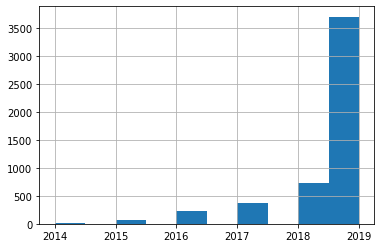

In [69]:
review_date = df['last_review'].apply(lambda x: x.year)
review_date.hist()

<AxesSubplot:>

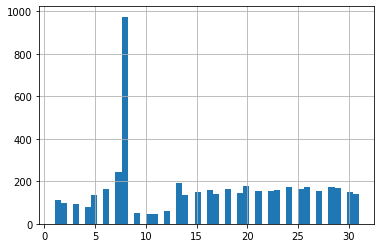

In [70]:
review_date_day = df['last_review'].apply(lambda x: x.day)
review_date_day.hist(bins=50)

<AxesSubplot:>

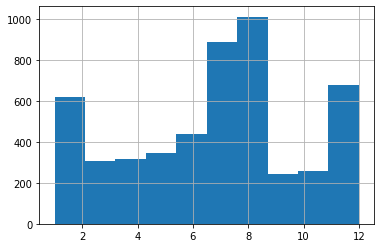

In [71]:
review_date_month = df['last_review'].apply(lambda x: x.month)
review_date_month.hist()

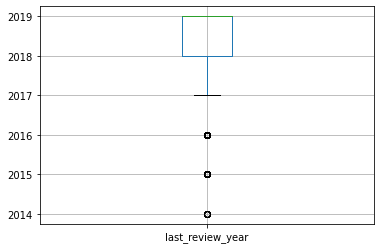

In [72]:
df['last_review_year'] = df['last_review'].apply(lambda x: x.year)
df.boxplot(column='last_review_year', sym='o', return_type='axes')
df = df.drop('last_review_year', axis=1)

# NO OUTLIERS IN THE DATE

In [73]:
#The only reasonable substitute for missing last review values is to use mode (most occuring value)
#df['last_review'] = pd.to_datetime(df['last_review']).dt.date
#val = df.last_review.mode()
#df['last_review']=pd.to_datetime(df['last_review'].fillna(val
df['last_review'].fillna(df['last_review'].mode()[0], inplace=True)                                                          
df.isnull().sum()

name                                 2
host_id                              0
host_name                            0
neighbourhood_group                  0
neighbourhood                        0
latitude                             0
longitude                            0
room_type                            0
price                                0
minimum_nights                       0
number_of_reviews                    0
last_review                          0
reviews_per_month                 2740
calculated_host_listings_count       0
availability_365                   386
dtype: int64

## Reviews Per Month


In [74]:
print(df[df['reviews_per_month'].isnull()]['neighbourhood'].value_counts())


Geylang                    344
Kallang                    343
Novena                     224
Bukit Merah                201
Rochor                     173
Downtown Core              145
Outram                     132
Queenstown                 115
Bedok                      114
River Valley                98
Tanglin                     76
Singapore River             64
Jurong East                 47
Jurong West                 47
Clementi                    46
Bukit Timah                 41
Newton                      41
Toa Payoh                   39
Marine Parade               37
Ang Mo Kio                  35
Hougang                     34
Orchard                     34
Pasir Ris                   31
Sengkang                    27
Bukit Batok                 27
Woodlands                   26
Bishan                      23
Central Water Catchment     23
Sembawang                   22
Yishun                      22
Choa Chu Kang               22
Tampines                    17
Punggol 

### One approach is to find the average reviews per month with respect to neighbourhood and replace null values with average


In [75]:
df['reviews_per_month'] = df['reviews_per_month'].fillna(df.groupby('neighbourhood')['reviews_per_month'].transform('mean'))


In [76]:
df.isnull().sum()


name                                2
host_id                             0
host_name                           0
neighbourhood_group                 0
neighbourhood                       0
latitude                            0
longitude                           0
room_type                           0
price                               0
minimum_nights                      0
number_of_reviews                   0
last_review                         0
reviews_per_month                   1
calculated_host_listings_count      0
availability_365                  386
dtype: int64

In [77]:
df.dropna(subset = ['reviews_per_month'], inplace = True)


In [78]:
df.isnull().sum()


name                                2
host_id                             0
host_name                           0
neighbourhood_group                 0
neighbourhood                       0
latitude                            0
longitude                           0
room_type                           0
price                               0
minimum_nights                      0
number_of_reviews                   0
last_review                         0
reviews_per_month                   0
calculated_host_listings_count      0
availability_365                  386
dtype: int64

In [79]:
df.groupby('neighbourhood_group')['availability_365'].mean()


neighbourhood_group
Central Region       216.747788
East Region          177.771855
North Region         209.445026
North-East Region    168.764706
West Region          188.258586
Name: availability_365, dtype: float64

In [80]:
df.groupby('neighbourhood')['availability_365'].mean()


neighbourhood
Ang Mo Kio                 169.018519
Bedok                      184.778107
Bishan                     179.763636
Bukit Batok                180.666667
Bukit Merah                212.216401
Bukit Panjang              142.848485
Bukit Timah                158.564516
Central Water Catchment    190.529412
Choa Chu Kang              141.233333
Clementi                   200.978723
Downtown Core              213.786070
Geylang                    196.721294
Hougang                    187.707547
Jurong East                212.579439
Jurong West                195.759398
Kallang                    243.817554
Mandai                     329.500000
Marina South                 0.000000
Marine Parade              132.887417
Museum                     227.616667
Newton                     227.349206
Novena                     234.107280
Orchard                    267.327273
Outram                     225.603037
Pasir Ris                  153.845070
Punggol                    156.57894

In [81]:
df.groupby(['neighbourhood_group', 'neighbourhood'])['availability_365'].mean()


neighbourhood_group  neighbourhood          
Central Region       Ang Mo Kio                        NaN
                     Bedok                             NaN
                     Bishan                     179.763636
                     Bukit Batok                       NaN
                     Bukit Merah                212.216401
                                                   ...    
West Region          Toa Payoh                         NaN
                     Tuas                        89.000000
                     Western Water Catchment    213.750000
                     Woodlands                         NaN
                     Yishun                            NaN
Name: availability_365, Length: 210, dtype: float64

#### In availability_365 case we will consider neighbourhood_group for aggregate average as their are less categories in the column
#### Hence it is easier to generalize rather than identifying patterns for each neighbourhood

In [82]:
df['availability_365'] = df['availability_365'].fillna(df.groupby('neighbourhood_group')['availability_365'].transform('mean'))


In [83]:
df['availability_365'] = df['availability_365'].apply(np.ceil)
df['availability_365'] = df['availability_365'].astype(int)

In [84]:
df.isnull().sum()

name                              2
host_id                           0
host_name                         0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
last_review                       0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

In [85]:
# Remove negative values in price column
df = df[~df['price'] < 0]

In [86]:
df['Total_Amount_Paid'] = df.price * df.minimum_nights


In [87]:
df.dtypes


name                                      object
host_id                                  float64
host_name                                 object
neighbourhood_group                     category
neighbourhood                             object
latitude                                 float64
longitude                                float64
room_type                               category
price                                      int64
minimum_nights                           float64
number_of_reviews                          int64
last_review                       datetime64[ns]
reviews_per_month                        float64
calculated_host_listings_count             int64
availability_365                           int32
Total_Amount_Paid                        float64
dtype: object

# T-Test


In [88]:
df['host_id'] = df['host_id'].astype(np.float64)
df['latitude'] = df['latitude'].astype(np.float64)
df['longitude'] = df['longitude'].astype(np.float64)
df['price'] = df['price'].astype(np.int64)
df['minimum_nights'] = df['minimum_nights'].astype(np.float64)
df['reviews_per_month'] = df['reviews_per_month'].astype(np.float64)
df['calculated_host_listings_count'] = df['calculated_host_listings_count'].astype(np.int64)
df['availability_365'] = df['availability_365'].astype(np.int64)

#df.dtypes

In [89]:
num_columns = ['latitude','longitude','price','minimum_nights','number_of_reviews','reviews_per_month','calculated_host_listings_count','availability_365','Total_Amount_Paid']


In [90]:
for i in range(len(num_columns)-1):
    for j in range(i+1,len(num_columns)):
        col1 = num_columns[i]
        col2 = num_columns[j]
        t_val, p_val = stats.ttest_ind(df[col1], df[col2])
        print("(%s,%s) => t-value= %s, p-value= %s" % (num_columns[i], num_columns[j], str(t_val), str(p_val)))

(latitude,longitude) => t-value= -170919.36414808003, p-value= 0.0
(latitude,price) => t-value= -43.6321774495353, p-value= 0.0
(latitude,minimum_nights) => t-value= -34.03071097811187, p-value= 5.633678112890004e-245
(latitude,number_of_reviews) => t-value= -34.348954053952745, p-value= 2.2337598176830605e-249
(latitude,reviews_per_month) => t-value= 23.12874867308488, p-value= 2.0824977842009198e-116
(latitude,calculated_host_listings_count) => t-value= -52.749504931210474, p-value= 0.0
(latitude,availability_365) => t-value= -129.95419820608618, p-value= 0.0
(latitude,Total_Amount_Paid) => t-value= -8.707646818327206, p-value= 3.407021249021193e-18
(longitude,price) => t-value= -17.16600299670573, p-value= 1.886697022746164e-65
(longitude,minimum_nights) => t-value= 182.82098719702753, p-value= 0.0
(longitude,number_of_reviews) => t-value= 270.62366722109147, p-value= 0.0
(longitude,reviews_per_month) => t-value= 8651.225763993309, p-value= 0.0
(longitude,calculated_host_listings_co

As shown in the results above all p-value for every pair turns out to be less than 0.05 (p-val < 0.05), infact its very small for every pair. Thus, there is a statistically significant difference between all above mentioned numeric columns

# Anova

In [91]:
#Categorical Columns

categorical = list((set(df.columns) - set(num_columns)) - set(['last_review']))
print(categorical)

['neighbourhood', 'host_id', 'name', 'neighbourhood_group', 'host_name', 'room_type']


In [92]:
['neighbourhood', 'room_type', 'host_name', 'host_id', 'name', 'neighbourhood_group']


['neighbourhood',
 'room_type',
 'host_name',
 'host_id',
 'name',
 'neighbourhood_group']

In [ ]:
import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Taking 1-way anova of Sales with all categorical variables
for i in categorical:
    model = ols('Total_Amount_Paid ~ C(Q("%s"))'% i, data=df).fit()
    anova_table = sm.stats.anova_lm(model, typ=2)
    print ("\nAnova => Total_Amount_Paid - %s" % i)
    display(anova_table)


Anova => Total_Amount_Paid - neighbourhood


,sum_sq,df,F,PR(>F)
"C(Q(""neighbourhood""))",3.146232e+10,41.0,0.942424,0.576012
Residual,6.359336e+12,7810.0,NaN,NaN


In [ ]:
Anova => Total_Amount_Paid - neighbourhood

With our null hypothesis being Ho = no difference between population means of Total_Amount_Paid and groups(categorical columns). Above results of 1-way Anova indicates that for room_type, neighbourhood_group, name and host_id p-value turns out to be less than 0.05, so we can reject our null hypothesis thus we can state with 95% confidence that difference between means exist for sales and groups in above mentioned columns

## Correlation Heatmap


<AxesSubplot:>

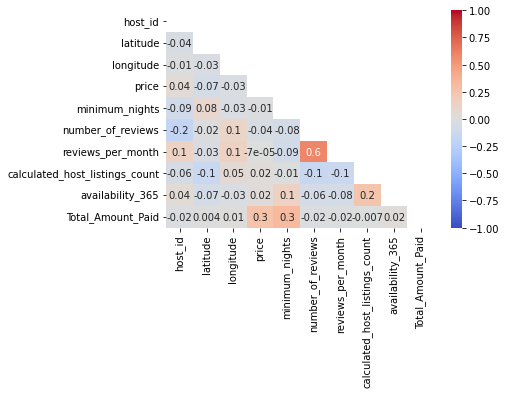

In [94]:
import matplotlib as plt
matrix = np.triu(df.corr())
sns.heatmap(df.corr(),annot=True, fmt='.1g',vmin=-1, vmax=1, center= 0,cmap='coolwarm',mask=matrix)


The correlation of Total paid with price and minimum nights is quite straight forward. Availability column is somewhat related to minimum nights and host listings count. Rest of the variables are weakly correlated.

